In [5]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

# **Data Preprocessing**

In [2]:
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


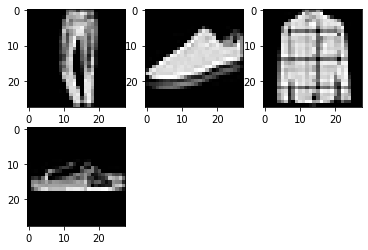

In [7]:
plt.subplot(231)
random_no = np.random.randint(0,len(X_train))
plt.imshow(X_train[random_no],cmap=plt.get_cmap('gray'))

plt.subplot(232)
random_no = np.random.randint(0,len(X_train))
plt.imshow(X_train[random_no],cmap=plt.get_cmap('gray'))

plt.subplot(233)
random_no = np.random.randint(0,len(X_train))
plt.imshow(X_train[random_no],cmap=plt.get_cmap('gray'))

plt.subplot(234)
random_no = np.random.randint(0,len(X_train))
plt.imshow(X_train[random_no],cmap=plt.get_cmap('gray'))

plt.show()

In [8]:
from keras.utils import np_utils
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,BatchNormalization
from keras import backend as K

In [9]:
batch_size = 128
epochs = 100

In [10]:
no_of_rows = X_train[0].shape[0]
no_of_cols = X_train[1].shape[0]

In [12]:
X_train = X_train.reshape(len(X_train),no_of_rows,no_of_cols,1)
X_test = X_test.reshape(len(X_test),no_of_rows,no_of_cols,1)

In [14]:
input_shape = (no_of_rows,no_of_cols,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [15]:
X_train /= 255
X_test /= 255

In [16]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [19]:
print(y_train.shape,y_test.shape)
print(X_train.shape,X_test.shape)

(60000, 10) (10000, 10)
(60000, 28, 28, 1) (10000, 28, 28, 1)


In [21]:
no_of_classes = y_train.shape[1]
no_of_pix = X_train.shape[2]*X_train.shape[1]

# **CNN Model Building and Training**

In [23]:

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(no_of_classes,activation='softmax'))

In [24]:
model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)             

In [25]:
model_fitting = model.fit(X_train,y_train,epochs=epochs,verbose=1,validation_data=(X_test,y_test))
score = model.evaluate(X_test,y_test,verbose=0)
print('Test Loss : ',score[0])
print('Test accuracy : ',score[1])

Epoch 1/100
1875/1875 [==============================] - 38s 4ms/step - loss: 2.5605 - accuracy: 0.2741 - val_loss: 0.9031 - val_accuracy: 0.6947
Epoch 2/100
1875/1875 [==============================] - 7s 4ms/step - loss: 1.3322 - accuracy: 0.5802 - val_loss: 0.7153 - val_accuracy: 0.7480
Epoch 3/100
1875/1875 [==============================] - 7s 4ms/step - loss: 1.0782 - accuracy: 0.6548 - val_loss: 0.6423 - val_accuracy: 0.7756
Epoch 4/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.9527 - accuracy: 0.6942 - val_loss: 0.5967 - val_accuracy: 0.7904
Epoch 5/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8810 - accuracy: 0.7105 - val_loss: 0.5631 - val_accuracy: 0.8021
Epoch 6/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8134 - accuracy: 0.7304 - val_loss: 0.5384 - val_accuracy: 0.8112
Epoch 7/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7736 - accuracy: 0.7459 - val_loss: 0.5202 - val_a

In [26]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 160706 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.26-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.26-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.26-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
import os
os.chdir("/content/drive/My Drive/Colab Notebooks")

In [30]:
model.save('clothing_classification_model.h5')